# Introduction to Regression with Neural Networks in TensorFlow

In [ ]:
# Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.6.0


## Creating data to view and fit

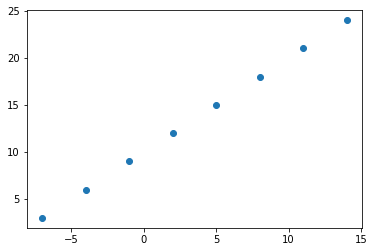

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualise it
plt.scatter(X, y)

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [ ]:
# Turn X and y into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32 )
y = tf.cast(tf.constant(y), dtype=tf.float32 )

In [ ]:
X.dtype

tf.float32

In [ ]:
# create an input and output shape
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow
1. **Creating a model** - define the input and output layers, as well as hidden layers of a deep learing model.
2. **Compiling a model** - define the loss function (in others, the functionthat tells out model how wrong it is), optimizer (tells our model how to improve the patters its learning) and evaluation metrics.
3. **Fitting a model** - letting the model try to find patterns between X & y 

In [ ]:
# Set ranodm seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                             
])

# 2. Compile a model using the Sequential API
model.compile(loss="mae",
              optimizer="sgd",
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=5);

Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# Try and make a prediction using our model
model.predict([17.0])

array([[12.716021]], dtype=float32)

## Improve model

Model can be improved, by altering the steps took to create a model.

1. **Creating a model** - add mode layers, increase increase the number of neurons on layers, change the activation function of each layers.
2. **Compiling a model** - change optimizer, learning rate
3. **Fitting a model** - increase number of epochs or fit model on more data 

In [ ]:
# Rebuilding the model

# 1. Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(250, activation="relu"),
  tf.keras.layers.Dense(200, activation="relu"),
  tf.keras.layers.Dense(150, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),                           
  tf.keras.layers.Dense(1)                             
])

# 2. Compile a model
model.compile(loss="mae",
              optimizer="adam",
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100);

Epoch 1/100
4/4 [==============================] - 1s 5ms/step - loss: 149.8919 - mae: 149.8919
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 115.6929 - mae: 115.6929
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 62.1174 - mae: 62.1174
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 24.6056 - mae: 24.6056
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 27.2886 - mae: 27.2886
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 18.7337 - mae: 18.7337
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 19.3977 - mae: 19.3977
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 12.7343 - mae: 12.7343
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 9.0977 - mae: 9.0977
Epoch 10/100
4/4 [==============================] - 0s 6ms/step - loss: 8.6517 - mae: 8.6517
Epoch 11/100
4/4 [==============================] - 0s 5ms/

In [ ]:
# Try and make a prediction using tuned model
model.predict([100.0])

array([[112.42811]], dtype=float32)

In [ ]:
# Increase amount of data
X = tf.cast(tf.constant([i for i in range(-10, 300, 3)]), dtype=tf.float32)
y = tf.cast(tf.constant([i + 10for i in range(-10,300, 3)]), dtype=tf.float32)

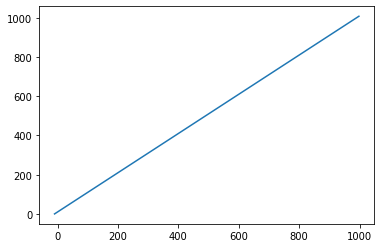

In [ ]:
plt.plot(X, y)

In [ ]:
# 1. Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(500, activation="relu"),
  tf.keras.layers.Dense(250, activation="relu"),
  tf.keras.layers.Dense(200, activation="relu"),
  tf.keras.layers.Dense(250, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),                           
  tf.keras.layers.Dense(1)                             
])

# 2. Compile a model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100);

4/4 [==============================] - 0s 5ms/step - loss: 4.0054 - mae: 4.0054
Epoch 98/100
4/4 [==============================] - 0s 5ms/step - loss: 3.6536 - mae: 3.6536
Epoch 99/100
4/4 [==============================] - 0s 5ms/step - loss: 3.6505 - mae: 3.6505
Epoch 100/100
4/4 [==============================] - 0s 5ms/step - loss: 3.7033 - mae: 3.7033


In [ ]:
# Try and make a prediction using tuned model
model.predict([100.0])

array([[112.42811]], dtype=float32)

## Evaluating a model

### The 3 sets
* Training set - the model learns from this data. 70-80% of the data.
* Validation set - the model is tuned on this data. 10-15% of the data.
* Test set - the model is evaluated on this data. 10-15% of the data.

In [ ]:
# Check number of samples
len(X)

104

In [ ]:
# Shuffle the data
tf.random.set_seed(42)
X_y = tf.transpose(tf.Variable([X, y]))
X_y = tf.random.shuffle(X_y)

X = X_y[:,0]
y = X_y[:,1]

In [ ]:
# Split the data into train and test sets
split_bound = round(len(X) * 0.8)
X_train = X[:split_bound]
X_test= X[split_bound:]

y_train = y[:split_bound]
y_test = y[split_bound:]

In [ ]:
len(X_test) + len(X_train)

104

In [ ]:
len(y_test) + len(y_train)

104

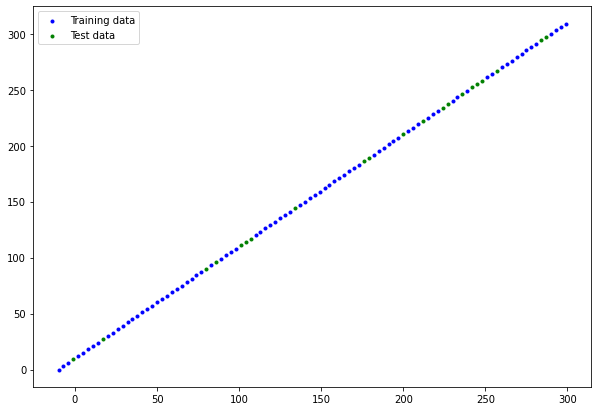

In [ ]:
# Visualise the splits
# blue = train, test = green
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c="b", label="Training data", marker=".")
plt.scatter(X_test, y_test, c="g", label="Test data", marker=".")
plt.legend()

In [ ]:
# Recreate a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]),
  tf.keras.layers.Dense(500, activation="relu"),
  tf.keras.layers.Dense(250, activation="relu"),
  tf.keras.layers.Dense(200, activation="relu"),
  tf.keras.layers.Dense(150, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(25, activation="relu"),                           
  tf.keras.layers.Dense(1)                             
])

# Compile a model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["mae"])

In [ ]:
model.summary()

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_312 (Dense)            (None, 1)                 2         
_________________________________________________________________
dense_313 (Dense)            (None, 500)               1000      
_________________________________________________________________
dense_314 (Dense)            (None, 250)               125250    
_________________________________________________________________
dense_315 (Dense)            (None, 200)               50200     
_________________________________________________________________
dense_316 (Dense)            (None, 150)               30150     
_________________________________________________________________
dense_317 (Dense)            (None, 100)               15100     
_________________________________________________________________
dense_318 (Dense)            (None, 50)              

* Total params - total number of parameters in the model
* Trainable parameters - these are the parameters(patters) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when bring in already learned patterns from other models during transfer learning)

In [ ]:
# Let's fit our model 
model.fit(X_train, y_train, epochs=250, verbose=False);

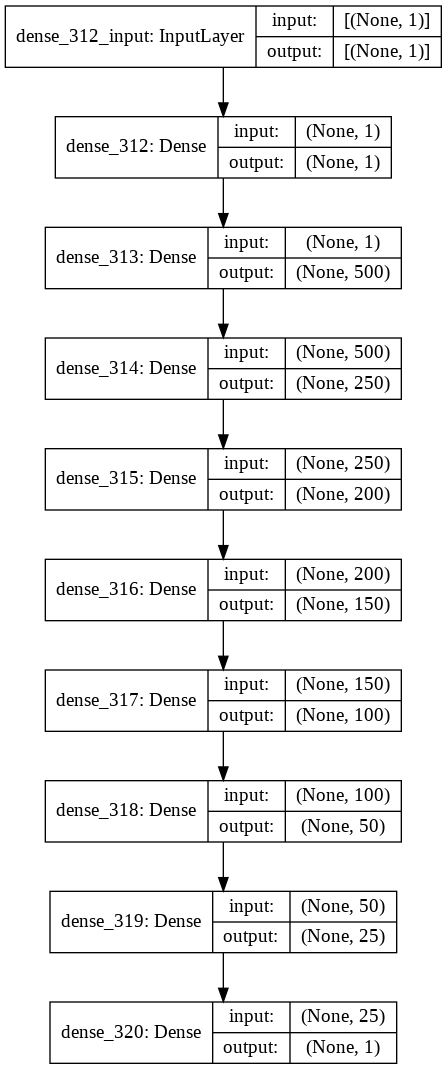

In [ ]:
# visualise model's layers
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

### Visualisation predictions

In [ ]:
# Make predictions on test dataset
y_pred = model.predict(X_test)
y_pred[:5]

array([[ 89.81748],
       [188.76393],
       [245.7666 ],
       [266.77063],
       [ 95.81147]], dtype=float32)

In [ ]:
# function for ploting y_pred vs y_true
def plot_predictions(y_pred, y_true, X_test):
  plt.figure(figsize=(10,7))
  # plot model preductions in red
  plt.scatter(X_test, y_pred, c="r", label="predictions")
  # plot model preductions in red
  plt.scatter(X_test, y_true, c="g", label="targets")
  plt.legend()

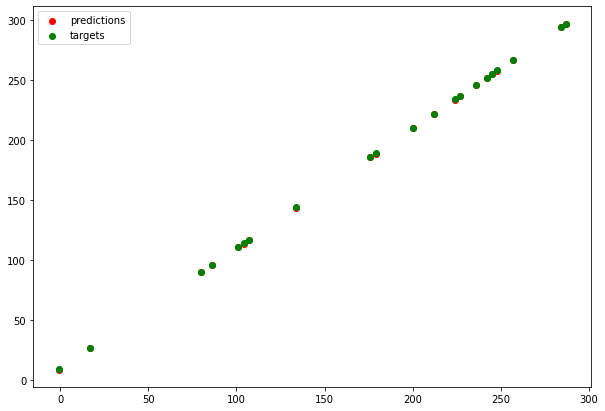

In [ ]:
plot_predictions(y_pred, y_test, X_test)

### Evaluating with evaluation metrics

Used metrics:
* MSE
* MAE
* Huber

In [ ]:
# Default evaluation metrics (mae)
model.evaluate(y_pred, y_test)

1/1 [==============================] - 0s 153ms/step - loss: 9.6115 - mae: 9.6115


[9.611488342285156, 9.611488342285156]

In [ ]:
y_preds_tensor = tf.squeeze(tf.constant(y_pred))

In [ ]:
# MAE
tf.metrics.mae(y_pred=y_preds_tensor, y_true=y_test)

<tf.Tensor: shape=(), dtype=float32, numpy=0.19606178>

In [ ]:
# MSE
tf.metrics.mse(y_test, y_preds_tensor)

<tf.Tensor: shape=(), dtype=float32, numpy=0.04208617>

In [ ]:
# Huber
tf.losses.huber(y_test, y_preds_tensor)

<tf.Tensor: shape=(), dtype=float32, numpy=0.021043085>

In [ ]:
# save a model
model.save("/content/drive/MyDrive/tensorflow/models/02_reggresion_with_NN/tuned_model.h5")

# Putting all those things together

In [3]:
# Import required libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# read in the insurance dataset
df = pd.read_csv("/content/drive/MyDrive/tensorflow/data/02_reggresion_with_NN/insurance.csv") 

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
len(df)

1338

In [ ]:
# Dataset doesn't have mising values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# one hot encode categorical features
df = pd.get_dummies(df)

In [ ]:
# create X and y
X = df.drop("charges", axis=1).astype("float32")
y = df["charges"].astype("float32")

In [ ]:
# split into train and test sets
split_bound = round(len(df) * 0.8)
X_train = tf.constant(X[:split_bound])
y_train = tf.constant(y[:split_bound])

y_test = tf.constant(y[split_bound:])
X_test = tf.constant(X[split_bound:])


In [ ]:
len(X_train) + len(X_test)

1338

In [ ]:
X_train.shape

TensorShape([1070, 11])

In [ ]:
# Modeling

# Recreate a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[11]),
  tf.keras.layers.Dense(500, activation="relu"),
  tf.keras.layers.Dense(250, activation="relu"),
  tf.keras.layers.Dense(200, activation="relu"),
  tf.keras.layers.Dense(150, activation="relu"),
  tf.keras.layers.Dense(1)                             
])

# Compile a model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0015),
              metrics=["mae"])

In [ ]:
# Fit the model
model.fit(X_train, y_train, epochs=100, verbose=False)

In [ ]:
# make a predictions
y_preds_tensor = tf.squeeze(tf.constant(model.predict(X_test)))

In [ ]:
# evaluate a model

# MAE
mae = tf.metrics.mae(y_pred=y_preds_tensor, y_true=y_test)

# MSE
mse = tf.metrics.mse(y_test, y_preds_tensor)

# Huber
huber = tf.losses.huber(y_test, y_preds_tensor)

mae, mse, huber

(<tf.Tensor: shape=(), dtype=float32, numpy=3457.6746>,
 <tf.Tensor: shape=(), dtype=float32, numpy=43846530.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3457.1753>)

### Data normalization

In [8]:
# reload dataset
df = pd.read_csv("/content/drive/MyDrive/tensorflow/data/02_reggresion_with_NN/insurance.csv")

In [10]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create X & y
X = df.drop("charges", axis=1)
y = df["charges"]

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns to numbers between 0 and 1.
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)


# Transform dataset
ct.fit(X)

X = ct.transform(X)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.shape

(1070, 11)

In [78]:
# Building a new model and training it on normalized data

tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[11]),
  tf.keras.layers.Dense(200, activation="relu"),
  tf.keras.layers.Dense(150, activation="relu"),
  tf.keras.layers.Dense(75, activation="relu"),
  tf.keras.layers.Dense(1)                             
])

# Compile a model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              metrics=["mae"])

In [ ]:
# Fit the model
model.fit(X_train, y_train, epochs=100);

In [80]:

# make a predictions
y_preds_tensor = tf.squeeze(tf.constant(model.predict(X_test)))

In [81]:
# evaluate a model

# MAE
mae = tf.metrics.mae(y_pred=y_preds_tensor, y_true=y_test)

# MSE
mse = tf.metrics.mse(y_test, y_preds_tensor)

# Huber
huber = tf.losses.huber(y_test, y_preds_tensor)

mae, mse, huber

(<tf.Tensor: shape=(), dtype=float32, numpy=2953.4834>,
 <tf.Tensor: shape=(), dtype=float32, numpy=43535190.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2952.9854>)

In [82]:
# save a model
model.save("/content/drive/MyDrive/tensorflow/models/02_reggresion_with_NN/tuned_normalized_model.h5")